In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from operator import attrgetter
import seaborn as sns
from numpy.random import normal
from datetime import datetime

## Generating daily trip data

In [2]:
test_data = normal(loc=789, scale=15, size=31)
test_data

array([791.93866686, 796.73750367, 801.58341983, 775.48235739,
       789.11345584, 788.2382739 , 774.33691321, 792.11724394,
       785.18077983, 768.72905311, 775.67148197, 789.7738907 ,
       758.04333193, 810.39287913, 787.74980814, 785.90888475,
       790.00691828, 758.76010358, 786.72401609, 787.18284197,
       798.80700766, 800.62324374, 776.52399875, 798.51492565,
       807.34704403, 794.45869221, 809.98305505, 784.97253591,
       798.42711132, 779.40059594, 798.36292087])

<AxesSubplot:ylabel='Count'>

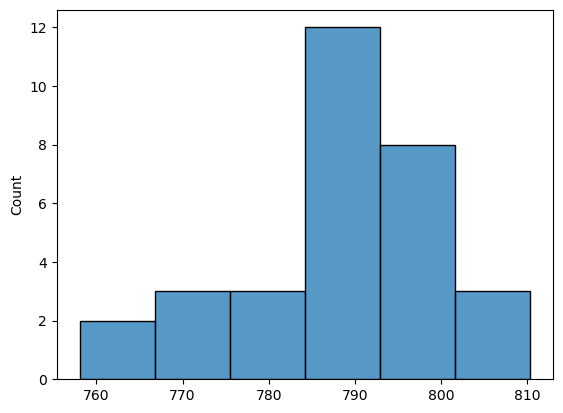

In [3]:
sns.histplot(test_data)

In [4]:
def create_daily_data(mean, sd, size):
    """
    Creates a dummy daily data following a normal curve based on the mean and sd
    """
    return np.around(normal(loc=mean, scale=sd, size=size))

In [5]:
avg_per_month = [789, 1047.39, 1065.93, 1261.53, 1217.35, 893.67, 871.97, 956.93, 1117.73, 1147.61, 1030.2, 980.13, 983.52, 1197.75]
avg_per_month = np.array(avg_per_month)
np.std(avg_per_month)

133.67900088668085

In [6]:
Jan22_data = pd.DataFrame(data=create_daily_data(789, 133.68, 31) , columns=['# Books'], index=pd.date_range("20220101", '20220131'))
Feb22_data = pd.DataFrame(data=create_daily_data(1047.39, 133.68, 28) , columns=['# Books'], index=pd.date_range("20220201", '20220228'))
Mar22_data = pd.DataFrame(data=create_daily_data(1065.93, 133.68, 31) , columns=['# Books'], index=pd.date_range("20220301", '20220331'))
Apr22_data = pd.DataFrame(data=create_daily_data(1261.53, 133.68, 30) , columns=['# Books'], index=pd.date_range("20220401", '20220430'))
May22_data = pd.DataFrame(data=create_daily_data(1217.35, 133.68, 31) , columns=['# Books'], index=pd.date_range("20220501", '20220531'))
Jun22_data = pd.DataFrame(data=create_daily_data(893.67, 133.68, 30) , columns=['# Books'], index=pd.date_range("20220601", '20220630'))
Jul22_data = pd.DataFrame(data=create_daily_data(871.97, 133.68, 31) , columns=['# Books'], index=pd.date_range("20220701", '20220731'))
Aug22_data = pd.DataFrame(data=create_daily_data(956.93, 133.68, 31) , columns=['# Books'], index=pd.date_range("20220801", '20220831'))
Sep22_data = pd.DataFrame(data=create_daily_data(1117.73, 133.68, 30) , columns=['# Books'], index=pd.date_range("20220901", '20220930'))
Oct22_data = pd.DataFrame(data=create_daily_data(1147.61, 133.68, 31) , columns=['# Books'], index=pd.date_range("20221001", '20221031'))
Nov22_data = pd.DataFrame(data=create_daily_data(1030.2, 133.68, 30) , columns=['# Books'], index=pd.date_range("20221101", '20221130'))
Dec22_data = pd.DataFrame(data=create_daily_data(980.13, 133.68, 31) , columns=['# Books'], index=pd.date_range("20221201", '20221231'))
Jan23_data = pd.DataFrame(data=create_daily_data(983.52, 133.68, 31) , columns=['# Books'], index=pd.date_range("20230101", '20230131'))
Feb23_data = pd.DataFrame(data=create_daily_data(1197.75, 133.68, 28) , columns=['# Books'], index=pd.date_range("20230201", '20230228'))

In [7]:
final_daily_trips = pd.concat([Jan22_data, Feb22_data, Mar22_data, Apr22_data, May22_data, Jun22_data, Jul22_data, Aug22_data, Sep22_data, 
           Oct22_data, Nov22_data, Dec22_data, Jan23_data, Feb23_data], axis=0).reset_index().rename(columns={'index':'Date'})
final_daily_trips

,Date,# Books
0,2022-01-01,690.0
1,2022-01-02,748.0
2,2022-01-03,824.0
3,2022-01-04,839.0
4,2022-01-05,617.0
...,...,...
419,2023-02-24,1125.0
420,2023-02-25,1234.0
421,2023-02-26,1121.0
422,2023-02-27,1080.0


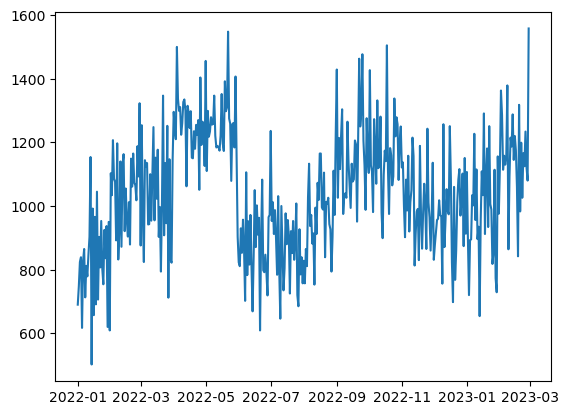

In [8]:
plt.plot(final_daily_trips['Date'], final_daily_trips['# Books'])

## FUELING EVENTS

In [9]:
gig_fuel_data = pd.read_csv('GIG Fuel Data')
gig_fuel_data.head()

,Client,Client Veh #,Holman Veh #,DIVISION,Market,Asset Type,Cylinders,Make Name,Model Name,Model Year,...,Aux Data 5,Aux Data 6,Aux Data 7,Aux Data 8,Aux Data 9,Aux Data 10,Aux Data 11,Aux Data 12,Aux Data 13,Aux Data 14
0,5ES0,NaN,D00725,1,BAYA,NaN,NaN,MISC,MISC DUMMY FUEL,2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5ES0,NaN,D00547,1,BAYA,NaN,NaN,MISCELLANEOUS,DUMMY FUEL,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1F53,NaN,56BAYF,1,BAYA,MISC,NaN,MISCELLANEOUS,DUMMY FUEL,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5ES0,NaN,D00559,1,BAYA,NaN,NaN,MISCELLANEOUS,DUMMY FUEL,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5ES0,NaN,D00221,1,BAYA,NaN,NaN,MISCELLANEOUS,DUMMY FUEL,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### counting vendors and member refueling events

In [10]:
gig_fuel_all = gig_fuel_data[gig_fuel_data['Market'] == 'BAYA']
gig_fuel_all = gig_fuel_all[gig_fuel_all["Drivers' first name"].isin(['Member','Vendor'])]
gig_fuel_all

,Client,Client Veh #,Holman Veh #,DIVISION,Market,Asset Type,Cylinders,Make Name,Model Name,Model Year,...,Aux Data 5,Aux Data 6,Aux Data 7,Aux Data 8,Aux Data 9,Aux Data 10,Aux Data 11,Aux Data 12,Aux Data 13,Aux Data 14
0,5ES0,NaN,D00725,1,BAYA,NaN,NaN,MISC,MISC DUMMY FUEL,2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5ES0,NaN,D00547,1,BAYA,NaN,NaN,MISCELLANEOUS,DUMMY FUEL,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1F53,NaN,56BAYF,1,BAYA,MISC,NaN,MISCELLANEOUS,DUMMY FUEL,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5ES0,NaN,D00559,1,BAYA,NaN,NaN,MISCELLANEOUS,DUMMY FUEL,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5ES0,NaN,D00221,1,BAYA,NaN,NaN,MISCELLANEOUS,DUMMY FUEL,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19867,5ES0,NaN,D00255,1,BAYA,NaN,NaN,MISCELLANEOUS,DUMMY FUEL,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19871,5ES0,NaN,D00252,1,BAYA,NaN,NaN,MISCELLANEOUS,DUMMY FUEL,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19872,5ES0,NaN,170161,1,BAYA,CAR,L4,TOYOTA,PRIUS C FOUR 1207,2017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19877,5ES0,NaN,D00110,1,BAYA,NaN,NaN,MISC,DUMMY VEHICLE,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
gig_fuel_all_smaller = gig_fuel_all[['Transaction date and Time', 'Odometer']]
gig_fuel_all_smaller['Transaction date and Time'] = pd.to_datetime(gig_fuel_all_smaller['Transaction date and Time']).dt.date
grouped_fuel_all = gig_fuel_all_smaller.groupby('Transaction date and Time').count()
new_date_range = pd.date_range(start="2022-01-01", end="2023-02-28")
grouped_fuel_all = grouped_fuel_all.reindex(new_date_range).reset_index().rename(columns={'Odometer':'# Cars Refueled by ALL', 'index':'Date'})
grouped_fuel_all

/tmp/ipykernel_180/888975737.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gig_fuel_all_smaller['Transaction date and Time'] = pd.to_datetime(gig_fuel_all_smaller['Transaction date and Time']).dt.date


,Date,# Cars Refueled by ALL
0,2022-01-01,8
1,2022-01-02,8
2,2022-01-03,6
3,2022-01-04,8
4,2022-01-05,5
...,...,...
419,2023-02-24,29
420,2023-02-25,33
421,2023-02-26,28
422,2023-02-27,21


### Counting Only Vendor Refueling

In [12]:
gig_fuel_vendor = gig_fuel_data[gig_fuel_data['Market'] == 'BAYA']
gig_fuel_vendor = gig_fuel_vendor[gig_fuel_vendor["Drivers' first name"] == 'Vendor']
gig_fuel_vendor

,Client,Client Veh #,Holman Veh #,DIVISION,Market,Asset Type,Cylinders,Make Name,Model Name,Model Year,...,Aux Data 5,Aux Data 6,Aux Data 7,Aux Data 8,Aux Data 9,Aux Data 10,Aux Data 11,Aux Data 12,Aux Data 13,Aux Data 14
46,1F53,NaN,16FUEL,1,BAYA,NaN,NaN,MISCELLANEOUS,DUMMY FUEL,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,1F53,NaN,16FUEL,1,BAYA,NaN,NaN,MISCELLANEOUS,DUMMY FUEL,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,1F53,NaN,16FUEL,1,BAYA,NaN,NaN,MISCELLANEOUS,DUMMY FUEL,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,1F53,NaN,16FUEL,1,BAYA,NaN,NaN,MISCELLANEOUS,DUMMY FUEL,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,1F53,NaN,16FUEL,1,BAYA,NaN,NaN,MISCELLANEOUS,DUMMY FUEL,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17788,5ES0,NaN,D00424,1,BAYA,NaN,NaN,MISC,DUMMY FUEL,2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17791,5ES0,NaN,D00423,1,BAYA,NaN,NaN,MISC,DUMMY FUEL,2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17792,5ES0,NaN,D00423,1,BAYA,NaN,NaN,MISC,DUMMY FUEL,2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17793,5ES0,NaN,D00422,1,BAYA,NaN,NaN,MISC,DUMMY FUEL,2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
gig_fuel_vendor_smaller = gig_fuel_vendor[['Transaction date and Time', 'Odometer']]
gig_fuel_vendor_smaller['Transaction date and Time'] = pd.to_datetime(gig_fuel_vendor_smaller['Transaction date and Time']).dt.date
grouped_fuel_vendor = gig_fuel_vendor_smaller.groupby('Transaction date and Time').count()
new_date_range = pd.date_range(start="2022-01-01", end="2023-02-28")
grouped_fuel_vendor = grouped_fuel_vendor.reindex(new_date_range).reset_index().rename(columns={'Odometer':'# Cars Refueled by VENDOR', 'index':'Date'})
grouped_fuel_vendor['# Cars Refueled by VENDOR'] = grouped_fuel_vendor['# Cars Refueled by VENDOR'].fillna(0)
grouped_fuel_vendor

/tmp/ipykernel_180/817417962.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gig_fuel_vendor_smaller['Transaction date and Time'] = pd.to_datetime(gig_fuel_vendor_smaller['Transaction date and Time']).dt.date


,Date,# Cars Refueled by VENDOR
0,2022-01-01,0.0
1,2022-01-02,0.0
2,2022-01-03,0.0
3,2022-01-04,0.0
4,2022-01-05,0.0
...,...,...
419,2023-02-24,0.0
420,2023-02-25,0.0
421,2023-02-26,0.0
422,2023-02-27,3.0


### Counting Only Members Refueling

In [14]:
gig_fuel_data = gig_fuel_data[gig_fuel_data['Market'] == 'BAYA']
print(gig_fuel_data["Drivers' first name"].value_counts())
gig_fuel_data = gig_fuel_data[gig_fuel_data["Drivers' first name"] == 'Member']
gig_fuel_data

Member      7767
Employee    5121
Vendor      2627
Name: Drivers' first name, dtype: int64


,Client,Client Veh #,Holman Veh #,DIVISION,Market,Asset Type,Cylinders,Make Name,Model Name,Model Year,...,Aux Data 5,Aux Data 6,Aux Data 7,Aux Data 8,Aux Data 9,Aux Data 10,Aux Data 11,Aux Data 12,Aux Data 13,Aux Data 14
0,5ES0,NaN,D00725,1,BAYA,NaN,NaN,MISC,MISC DUMMY FUEL,2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5ES0,NaN,D00547,1,BAYA,NaN,NaN,MISCELLANEOUS,DUMMY FUEL,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1F53,NaN,56BAYF,1,BAYA,MISC,NaN,MISCELLANEOUS,DUMMY FUEL,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5ES0,NaN,D00559,1,BAYA,NaN,NaN,MISCELLANEOUS,DUMMY FUEL,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5ES0,NaN,D00221,1,BAYA,NaN,NaN,MISCELLANEOUS,DUMMY FUEL,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19867,5ES0,NaN,D00255,1,BAYA,NaN,NaN,MISCELLANEOUS,DUMMY FUEL,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19871,5ES0,NaN,D00252,1,BAYA,NaN,NaN,MISCELLANEOUS,DUMMY FUEL,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19872,5ES0,NaN,170161,1,BAYA,CAR,L4,TOYOTA,PRIUS C FOUR 1207,2017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19877,5ES0,NaN,D00110,1,BAYA,NaN,NaN,MISC,DUMMY VEHICLE,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
gig_fuel_data_smaller = gig_fuel_data[['Transaction date and Time', 'Odometer']]
gig_fuel_data_smaller['Transaction date and Time'] = pd.to_datetime(gig_fuel_data_smaller['Transaction date and Time']).dt.date
grouped_fuel_data = gig_fuel_data_smaller.groupby('Transaction date and Time').count()
new_date_range = pd.date_range(start="2022-01-01", end="2023-02-28")
grouped_fuel_data = grouped_fuel_data.reindex(new_date_range).reset_index().rename(columns={'Odometer':'# Cars Refueled by CUSTOMER', 'index':'Transaction date'})
grouped_fuel_data

/tmp/ipykernel_180/3986462897.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gig_fuel_data_smaller['Transaction date and Time'] = pd.to_datetime(gig_fuel_data_smaller['Transaction date and Time']).dt.date


,Transaction date,# Cars Refueled by CUSTOMER
0,2022-01-01,8
1,2022-01-02,8
2,2022-01-03,6
3,2022-01-04,8
4,2022-01-05,5
...,...,...
419,2023-02-24,29
420,2023-02-25,33
421,2023-02-26,28
422,2023-02-27,18


### Merging all dfs

In [16]:
merged_fuel_data = grouped_fuel_data.merge(final_daily_trips, left_on='Transaction date', right_on='Date').drop(columns={'Date'})
merged_fuel_all = merged_fuel_data.merge(grouped_fuel_all, left_on='Transaction date', right_on='Date').drop(columns={'Date'})
merged_all = merged_fuel_all.merge(grouped_fuel_vendor, left_on='Transaction date', right_on='Date').drop(columns={'Date'})
P_refuel = merged_all['# Cars Refueled by CUSTOMER'] / merged_fuel_all['# Cars Refueled by ALL']
merged_all['P(Refuel)'] = P_refuel
merged_all

,Transaction date,# Cars Refueled by CUSTOMER,# Books,# Cars Refueled by ALL,# Cars Refueled by VENDOR,P(Refuel)
0,2022-01-01,8,690.0,8,0.0,1.000000
1,2022-01-02,8,748.0,8,0.0,1.000000
2,2022-01-03,6,824.0,6,0.0,1.000000
3,2022-01-04,8,839.0,8,0.0,1.000000
4,2022-01-05,5,617.0,5,0.0,1.000000
...,...,...,...,...,...,...
419,2023-02-24,29,1125.0,29,0.0,1.000000
420,2023-02-25,33,1234.0,33,0.0,1.000000
421,2023-02-26,28,1121.0,28,0.0,1.000000
422,2023-02-27,18,1080.0,21,3.0,0.857143


In [17]:
np.mean(merged_all['# Cars Refueled by CUSTOMER'])

17.99764150943396

In [18]:
np.mean(merged_all['# Cars Refueled by VENDOR'])

6.162735849056604

In [19]:
np.mean(merged_all['P(Refuel)'])

0.8120385357265535

<AxesSubplot:xlabel='P(Refuel)', ylabel='Count'>

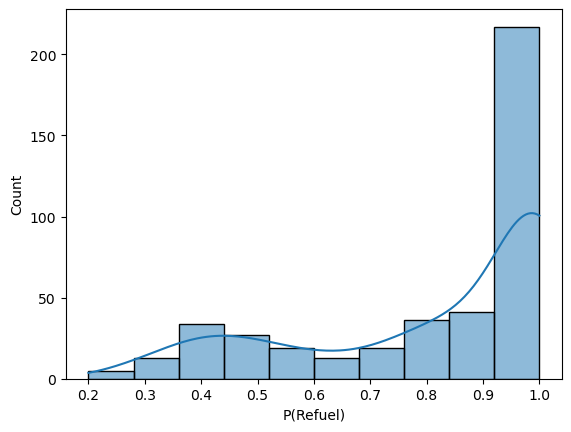

In [20]:
sns.histplot(merged_all, x='P(Refuel)', kde=True)

<AxesSubplot:xlabel='# Cars Refueled by CUSTOMER', ylabel='Count'>

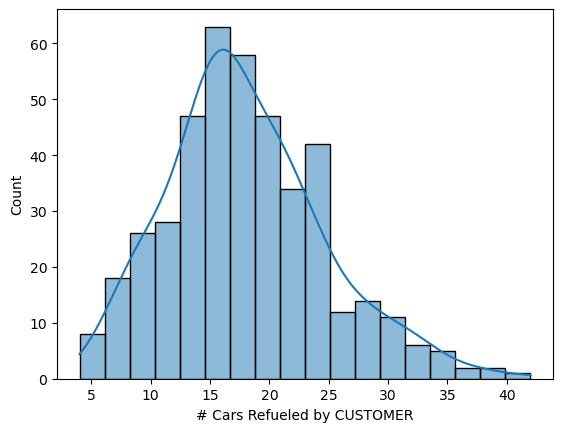

In [21]:
sns.histplot(merged_all, x='# Cars Refueled by CUSTOMER', kde=True)

## Version 2 TESTING

#### This one works

In [86]:
class Refuel_2():
    def __init__(self):
        self.num_in_system = 0
        
        self.clock = 0.0
        self.t_arrival = self.generate_interarrival()
        self.t_depart_to_vendors = float('inf')
        self.t_depart_fueled = float('inf')
        
        self.num_arrivals = 0
        self.num_to_vendors = 0
        self.num_fueled = 0
        self.total_wait = 0.0
        
    def advance_time(self):
        t_event = min(self.t_arrival, self.t_depart_to_vendors, self.t_depart_fueled)
        
        self.total_wait += self.num_in_system*(t_event - self.clock)
        self.clock = t_event
        
        if self.t_arrival < self.t_depart_to_vendors and self.t_arrival < self.t_depart_fueled:
            self.handle_arrival_event()
        elif self.t_depart_fueled < self.t_arrival and self.t_depart_fueled < self.t_depart_to_vendors:
            self.handle_depart_fuel()
        else:
            self.handle_depart_vendor()
            
            
    def handle_arrival_event(self):
        self.num_in_system += 1
        self.num_arrivals += 1
        
        if self.num_in_system > 0:
            
            if np.random.choice([0,1],p=[0.19,0.81])==1: #probability a car is refueled (1= refueled, 0= not refueled)
                self.t_depart_fueled = self.clock + self.generate_service_fuel()
            else:
                if np.random.choice([0,1],p=[0.81,0.19])==1: #probability the car's fuel level fall below 25% (1=falls below, 0=doesn't)
                    self.t_depart_to_vendors = self.clock + self.generate_service_vendors()
                    
                else:
                    self.t_arrival = self.clock + self.generate_interarrival()
        else:
            self.t_arrival = self.clock + self.generate_interarrival()
                
        
    def handle_depart_fuel(self):
        
        if self.num_in_system > 0:
            self.t_depart_fueled = self.clock + self.generate_service_fuel()
            self.num_fueled += 1
            self.num_in_system -= 1
        else:
            self.t_depart_fueled = float('inf')
            
    def handle_depart_vendor(self):
        
        if self.num_in_system > 0:
            self.t_depart_to_vendors = self.clock + self.generate_service_vendors()
            self.num_to_vendors += 1
            self.num_in_system -= 1
            
        else:
            self.t_depart_to_vendors = float('inf')
        
    def generate_interarrival(self):
        return np.random.poisson(1/159.25)
    def generate_service_fuel(self):
        return np.random.exponential(1/18)
    def generate_service_vendors(self):
        return np.random.exponential(1/6)

In [87]:
np.random.seed(253)

r = Refuel_2()

vendors=[]
refueled=[]
vendor_depart_time=[]
for i in range(531):
    r.__init__()
    r.advance_time()
    cars_to_vendors = r.t_depart_to_vendors
    vendors.append(cars_to_vendors)
    
    cars_refueled = r.t_depart_fueled
    refueled.append(cars_refueled)
    
    wait_times = r.t_depart_to_vendors
    vendor_depart_time.append(wait_times)

cars_to_vendors = sum(np.isinf(np.array(vendors)) == False)
print( f'A total of {cars_to_vendors} cars go to vendors')
cars_refueled = sum(np.isinf(np.array(refueled)) == False)
print( 'A total of {} cars are refueled by the customers with 0.81 probability'.format(cars_refueled))


A total of 24 cars go to vendors
A total of 429 cars are refueled by the customers with 0.81 probability


In [88]:

def One_Refueling_Simulation(n_cars):
    """
    Run this code to run the simulation once, enter the number of cars as an argument.
    
    It returns the number of cars that are refueled by vendors and users separately.
    """
    r = Refuel_2()
    vendors=[]
    refueled=[]
    for i in range(531):
        r.__init__()
        r.advance_time()
        cars_to_vendors = r.t_depart_to_vendors
        vendors.append(cars_to_vendors)
    
        cars_refueled = r.t_depart_fueled
        refueled.append(cars_refueled)
    cars_to_vendors = sum(np.isinf(np.array(vendors)) == False)
    cars_refueled = sum(np.isinf(np.array(refueled)) == False)
    
    return cars_to_vendors, cars_refueled, ( f'A total of {cars_to_vendors} cars go to vendors and a total of {cars_refueled} cars are refueled by the customers')

In [89]:
One_Refueling_Simulation(531)

(11,
 445,
 'A total of 11 cars go to vendors and a total of 445 cars are refueled by the customers')

In [90]:
def multiple_simulation(n_sims, n_cars):
    """
    Run this code to run the simulation n times, enter the number of simulation and number of cars as an argument.
    
    It returns a dataframe consists of the number of cars that are refueled by vendors and users separately.
    """
    
    final_df = pd.DataFrame(columns=['Refueled by Vendors', 'Refueled by Customers'])
    for i in range(n_sims):
        cars_to_vendors = One_Refueling_Simulation(n_cars)[0]
        cars_refueled = One_Refueling_Simulation(n_cars)[1]
        ref_series = pd.Series([cars_to_vendors, cars_refueled], index=final_df.columns)
        final_df = final_df.append(ref_series, ignore_index=True)
    return final_df

In [91]:
refuels_df = multiple_simulation(500, 531) #may take ~2 minutes to run
refuels_df['Customer refuel ratio'] = refuels_df['Refueled by Customers']/(refuels_df['Refueled by Customers'] + refuels_df['Refueled by Vendors'])
print(refuels_df)
print(np.mean(refuels_df['Refueled by Vendors']))
print(np.mean(refuels_df['Refueled by Customers']))

    Refueled by Vendors Refueled by Customers Customer refuel ratio
0                    16                   428              0.963964
1                    15                   414              0.965035
2                    12                   428              0.972727
3                    12                   446              0.973799
4                    18                   431              0.959911
..                  ...                   ...                   ...
495                  16                   441              0.964989
496                  13                   435              0.970982
497                  22                   420              0.950226
498                  18                   420              0.958904
499                  11                   427              0.974886

[500 rows x 3 columns]
19.276
430.282


Text(0.5, 0, '# Cars Refueled by Customers')

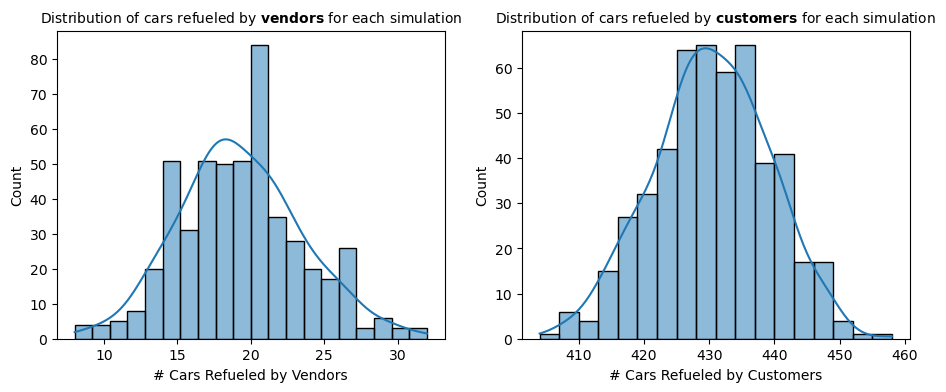

In [92]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
sns.histplot(data=refuels_df, x='Refueled by Vendors', kde=True)
plt.title(r'Distribution of cars refueled by $\bfvendors$ for each simulation', size=10)
plt.xlabel('# Cars Refueled by Vendors')

plt.subplot(122)
sns.histplot(data=refuels_df, x='Refueled by Customers', kde=True)
plt.title(r'Distribution of cars refueled by $\bfcustomers$ for each simulation', size=10)
plt.xlabel('# Cars Refueled by Customers')

In [93]:
print('Vendors to customers refuel ratio:' ,(cars_to_vendors/(cars_to_vendors+cars_refueled)))

Vendors to customers refuel ratio: 0.052980132450331126


### Profit Calculation

In [109]:
revenue_per_full_car = 250
cost_of_vendor_per_car = 7.5 # data provided by GIG


#### E[profit without incentive] = E[revenue from full cars] - E[cost of vendors]


In [110]:
def profit_without_incentive(revenue_per_full_car, cost_of_vendor_per_car, n_vendor_car, n_customer_car):
    n_full_cars = n_vendor_car + n_customer_car
    return n_full_cars * revenue_per_full_car - n_vendor_car * cost_of_vendor_per_car

In [111]:
n_cars = 531
"""n_vendor_car = 0.19 * n_cars # considering that P(customer refuels) = 0.81 above
n_customer_car = 0.81 * n_cars"""

'n_vendor_car = 0.19 * n_cars # considering that P(customer refuels) = 0.81 above\nn_customer_car = 0.81 * n_cars'

In [112]:
n_vendor_car = refuels_df['Refueled by Vendors']
n_customer_car = refuels_df['Refueled by Customers']

In [113]:
profits = profit_without_incentive(revenue_per_full_car, cost_of_vendor_per_car, n_vendor_car, n_customer_car)

In [114]:
profits

0      110880.0
1      107137.5
2      109910.0
3      114410.0
4      112115.0
         ...   
495    114130.0
496    111902.5
497    110335.0
498    109365.0
499    109417.5
Length: 500, dtype: object

In [115]:
np.mean(profits)

112244.93

### Profit w incentive


In [160]:
class Refuel_2_inc():
    def __init__(self):
        self.num_in_system = 0
        
        self.clock = 0.0
        self.t_arrival = self.generate_interarrival()
        self.t_depart_to_vendors = float('inf')
        self.t_depart_fueled = float('inf')
        
        self.num_arrivals = 0
        self.num_to_vendors = 0
        self.num_fueled = 0
        self.total_wait = 0.0
        
    def advance_time(self):
        t_event = min(self.t_arrival, self.t_depart_to_vendors, self.t_depart_fueled)
        
        self.total_wait += self.num_in_system*(t_event - self.clock)
        self.clock = t_event
        
        if self.t_arrival < self.t_depart_to_vendors and self.t_arrival < self.t_depart_fueled:
            self.handle_arrival_event()
        elif self.t_depart_fueled < self.t_arrival and self.t_depart_fueled < self.t_depart_to_vendors:
            self.handle_depart_fuel()
        else:
            self.handle_depart_vendor()
            
            
    def handle_arrival_event(self):
        self.num_in_system += 1
        self.num_arrivals += 1
        
        if self.num_in_system > 0:
            
            if np.random.choice([0,1],p=[0.1,0.9])==1: #probability a car is refueled (1= refueled, 0= not refueled)
                self.t_depart_fueled = self.clock + self.generate_service_fuel()
            else:
                if np.random.choice([0,1],p=[0.81,0.19])==1: #probability the car's fuel level fall below 25% (1=falls below, 0=doesn't)
                    self.t_depart_to_vendors = self.clock + self.generate_service_vendors()
                    
                else:
                    self.t_arrival = self.clock + self.generate_interarrival()
        else:
            self.t_arrival = self.clock + self.generate_interarrival()
                
        
    def handle_depart_fuel(self):
        
        if self.num_in_system > 0:
            self.t_depart_fueled = self.clock + self.generate_service_fuel()
            self.num_fueled += 1
            self.num_in_system -= 1
        else:
            self.t_depart_fueled = float('inf')
            
    def handle_depart_vendor(self):
        
        if self.num_in_system > 0:
            self.t_depart_to_vendors = self.clock + self.generate_service_vendors()
            self.num_to_vendors += 1
            self.num_in_system -= 1
            
        else:
            self.t_depart_to_vendors = float('inf')
        
    def generate_interarrival(self):
        return np.random.poisson(1/65)
    def generate_service_fuel(self):
        return np.random.exponential(1/18)
    def generate_service_vendors(self):
        return np.random.exponential(1/6)

In [161]:
def One_Refueling_Simulation_inc(n_cars):
    """
    Run this code to run the simulation once, enter the number of cars as an argument.
    
    It returns the number of cars that are refueled by vendors and users separately.
    """
    r = Refuel_2_inc()
    vendors=[]
    refueled=[]
    for i in range(531):
        r.__init__()
        r.advance_time()
        cars_to_vendors = r.t_depart_to_vendors
        vendors.append(cars_to_vendors)
    
        cars_refueled = r.t_depart_fueled
        refueled.append(cars_refueled)
    cars_to_vendors = sum(np.isinf(np.array(vendors)) == False)
    cars_refueled = sum(np.isinf(np.array(refueled)) == False)
    
    return cars_to_vendors, cars_refueled, ( f'A total of {cars_to_vendors} cars go to vendors and a total of {cars_refueled} cars are refueled by the customers')

In [162]:
One_Refueling_Simulation(531)

(14,
 431,
 'A total of 14 cars go to vendors and a total of 431 cars are refueled by the customers')

In [163]:
def multiple_simulation_inc(n_sims, n_cars):
    """
    Run this code to run the simulation n times, enter the number of simulation and number of cars as an argument.
    
    It returns a dataframe consists of the number of cars that are refueled by vendors and users separately.
    """
    
    final_df = pd.DataFrame(columns=['Refueled by Vendors', 'Refueled by Customers'])
    for i in range(n_sims):
        cars_to_vendors = One_Refueling_Simulation_inc(n_cars)[0]
        cars_refueled = One_Refueling_Simulation_inc(n_cars)[1]
        ref_series = pd.Series([cars_to_vendors, cars_refueled], index=final_df.columns)
        final_df = final_df.append(ref_series, ignore_index=True)
    return final_df

In [164]:
refuels_df = multiple_simulation_inc(500, 531) #may take ~2 minutes to run
refuels_df['Customer refuel ratio'] = refuels_df['Refueled by Customers']/(refuels_df['Refueled by Customers'] + refuels_df['Refueled by Vendors'])
print(refuels_df)
print(np.mean(refuels_df['Refueled by Vendors']))
print(np.mean(refuels_df['Refueled by Customers']))

    Refueled by Vendors Refueled by Customers Customer refuel ratio
0                    12                   477               0.97546
1                     9                   479              0.981557
2                    10                   470              0.979167
3                    10                   479               0.97955
4                     7                   482              0.985685
..                  ...                   ...                   ...
495                   9                   485              0.981781
496                  10                   473              0.979296
497                   7                   482              0.985685
498                  10                   475              0.979381
499                   9                   480              0.981595

[500 rows x 3 columns]
10.228
478.118


In [165]:
def profit_with_incentive(cost_of_incentive_per_car, revenue_per_full_car, cost_of_vendor_per_car, n_vendor_car, n_customer_car):
    n_full_cars = n_vendor_car + n_customer_car
    return n_full_cars * revenue_per_full_car - n_vendor_car * cost_of_vendor_per_car - cost_of_incentive_per_car * n_customer_car

In [166]:
n_vendor_car = refuels_df['Refueled by Vendors']
n_customer_car = refuels_df['Refueled by Customers']
revenue_per_full_car = 250
cost_of_vendor_per_car = 7.5
cost_of_incentive_per_car = 20

profits = profit_with_incentive(cost_of_incentive_per_car, revenue_per_full_car, cost_of_vendor_per_car, n_vendor_car, n_customer_car)
print(profits)
np.mean(profits)

0      112620.0
1      112352.5
2      110525.0
3      112595.0
4      112557.5
         ...   
495    113732.5
496    111215.0
497    112557.5
498    111675.0
499    112582.5
Length: 500, dtype: object


112447.43